## **1. Series Expansion**

Taylor series

$$ f(x) =\sum_{n=0}^{\infty}\frac{f^{(n)}a}{n!}(x-a)^n $$

where $f^{(n)}$ is the $n^{th}$ derivative of $f$

`series(f(x), x)` or `f(x).series(x)`

In [20]:
from sympy import *

x = Symbol('x')

ts_sin = series(sin(x), x)      # using first syntax
ts_cos = cos(x).series(x)       # using second syntax
print("Taylor series for sin(x):", ts_sin)
print("Taylor series for cos(x):", ts_cos)

Taylor series for sin(x): x - x**3/6 + x**5/120 + O(x**6)
Taylor series for cos(x): 1 - x**2/2 + x**4/24 + O(x**6)


In [21]:
from sympy import *

x = Symbol('x')

ts_sin = series(sin(x), x).removeO()
ts_cos = series(cos(x), x).removeO()
print("Taylor series for sin(x):", ts_sin)
print("Taylor series for cos(x):", ts_cos)

Taylor series for sin(x): x**5/120 - x**3/6 + x
Taylor series for cos(x): x**4/24 - x**2/2 + 1


### 

specify the point `a` around which we want to expand and the maximum term power, `maxTerm`:

`series(f(x), x, a, maxTerm)`

In [22]:
from sympy import *

x = Symbol('x')

ts_sin = series(sin(x), x, pi/4, 5) # taylor series around pi/4 with max power 5
ts_cos = series(cos(x), x, pi/3, 4) #  taylor series around pi/3 with max power 4
print("Taylor series for sin(x):", ts_sin)
print("Taylor series for cos(x):", ts_cos)

Taylor series for sin(x): sqrt(2)/2 + sqrt(2)*(x - pi/4)/2 - sqrt(2)*(x - pi/4)**2/4 - sqrt(2)*(x - pi/4)**3/12 + sqrt(2)*(x - pi/4)**4/48 + O((x - pi/4)**5, (x, pi/4))
Taylor series for cos(x): 1/2 - sqrt(3)*(x - pi/3)/2 - (x - pi/3)**2/4 + sqrt(3)*(x - pi/3)**3/12 + O((x - pi/3)**4, (x, pi/3))


### 

**Substituting values**

In [23]:
from sympy import *

x = Symbol('x')

s8 = sin(x).series(x, 0, 8).removeO()
print("Taylor series for sin(x)", s8)
print('-----')
print("Taylor series for sin(x):", s8.subs({x: pi/10}))

Taylor series for sin(x) -x**7/5040 + x**5/120 - x**3/6 + x
-----
Taylor series for sin(x): -pi**3/6000 - pi**7/50400000000 + pi**5/12000000 + pi/10


#### **Formal power series**

$$\sum_{k=0}^{\infty}a_kx^k$$

`fps(f(x), x, a)`

`fps()` is used in combination with its `truncate(n)` method which returns the first n terms of the series.

`fps(f(x), x, a).truncate(n)`

In [24]:
from sympy import *

x = Symbol('x')

fps_exp = fps(exp(x), x, 0).truncate(6).removeO() # formal power series of exp around 0
print(fps_exp.subs({x: 2}))

109/15


extract the $15^{th}$ term from the expansion of $e^x$

In [25]:
from sympy import *

x = Symbol('x')

fps_exp = fps(exp(x), x, 0) # formal power series of exp around 0
print(fps_exp[15])

x**15/1307674368000


## **2. Solving Equations**

`solve(f(x), x)`

Usually, for single variable equations, it returns a *list* and for multivariable equations, it returns a *dictionary*.

#### 

$$2x + 3 = 0$$

In [26]:
from sympy import *
def f(x):
    return 2*x + 3
x = Symbol('x')
sol = solve(f(x),x)
print(sol)

[-3/2]


#### 

$$x^2 - x + 6 = 0$$

In [27]:
def f(x):
    return x**2 -x -6
x = Symbol('x')
sol = solve(f(x),x)
print(sol)

[-2, 3]


#### 

$$x^2 + 4x +5 = 0$$

In [28]:
def f(x):
    return x**2 +4*x +5
x = Symbol('x')
sol = solve(f(x),x)
print(sol)

[-2 - I, -2 + I]


#### 

`solve(f(x) > a, x)`

In [29]:
def f(x):
    return x - 4 

def g(x):
    return x**2 - 4 

x = Symbol('x')
sol1 = solve(f(x) > 0, x)
print(sol1) 
sol2 = solve(g(x) > 0, x)
print(sol2)

(4 < x) & (x < oo)
((-oo < x) & (x < -2)) | ((2 < x) & (x < oo))


In the code above (lines 10 and 11), we have computed the values of $x$ in the interval $f(x)>0$ and $g(x)>0$ respectively.

#### 

$$\tan^2(x) - 3 = 0$$

In [30]:
def f(x):
    return tan(x)**2 - 3 

x = Symbol('x')
sol = solve(f(x), x)
print(sol) 

[-pi/3, pi/3]


solutions are in the range $-\pi <= x <\pi$

### **Solving systems of equations**

This system of equations is to be in a list as the first argument of `solve()` and the variables will be in a list as the second argument of `solve()`:

`solve([eq1, eq2,...eqN], [x1, x2, x3,...xN])`

$$x + y - z - 4 = 0$$
$$x - 2*y + 3*z + 6 = 0$$
$$2*x + 3*y + z - 7 = 0$$

In [31]:
x, y, z = symbols('x y z')
# defining eqautions 
eq1 = x + y - z - 4
eq2 = x - 2*y + 3*z + 6
eq3 = 2*x +3*y + z - 7 

sol = solve([eq1, eq2, eq3], [x, y, z])

print(sol)
print(type(sol))
print("x =", sol[x])
print("y =", sol[y])
print("z =", sol[z])

{y: 2, z: -1, x: 1}
<class 'dict'>
x = 1
y = 2
z = -1


Notice that the type of the sol is a *dictionary* where each variable is a key to its corresponding value.

### **Symbolic solution**

$$x + y - z - a = 0$$
$$x - 2*y + 3*z + b = 0$$
$$2*x + 3*y + z - c = 0$$

In [32]:
from sympy import *

x, y, z = symbols('x y z')
a, b, c = symbols('a b c')
# defining eqautions 
eq1 = x + y - z - a
eq2 = x - 2*y + 3*z + b
eq3 = 2*x +3*y + z - c 

sol = solve([eq1, eq2, eq3], [x, y, z])

print(sol)

print("x =", sol[x])
print("y =", sol[y])
print("z =", sol[z])

{y: -5*a/13 + 3*b/13 + 4*c/13, z: -7*a/13 - b/13 + 3*c/13, x: 11*a/13 - 4*b/13 - c/13}
x = 11*a/13 - 4*b/13 - c/13
y = -5*a/13 + 3*b/13 + 4*c/13
z = -7*a/13 - b/13 + 3*c/13


## **3. Ordinary Differential Equations (ODE)**

常微分方程

`Function` and `Eq` classes

`Eq` is used to define equations in SymPy, the comma separates the right-hand side from the left-hand side
    
    Eq(lhs,rhs)

Define a function of symbol `x`:

    x = Symbol('x')
    f = Function('f')(x)
    
Compute the derivate of the `Function`, we use the diff() methods:

    f.diff(x) # first order derivative
    f.diff(x,x) # second order derivative
    
Steps to solve the ODE:    
    
    1. Set up the ODE.
    2. Pass it as the first argument of dsolve().
    3. Pass the function f(x) as the second argument for which we will solve the equation.


#### 
$$\frac{d y}{d x} + 5yx^2 = 0$$

In [33]:
from sympy import *

x = symbols('x')
y = Function('y')(x)

dydx = y.diff(x)
diff_eq = Eq(dydx + 5*y*x**2, 0)
z = dsolve(diff_eq)
print(z)

Eq(y(x), C1*exp(-5*x**3/3))


$$ y(x) = C_1e^{\frac{-5x^3}{3}}$$

In [34]:
print(z.rhs)

C1*exp(-5*x**3/3)


#### 

#### **Higher-ODEs**

The equation of motion for the damped harmonic oscillator is:

$$\frac{d^2 x}{d t^2} + 2\zeta\omega_0\frac{d x}{d t} + \omega^2_0x = 0$$

where $x$ is the position of the oscillator, $t$ is the time, $\zeta$ is the damping ratio and $\omega_0$ is the oscillator freq.

In [35]:
from sympy import *

t = Symbol('t')
x = Function('x')(t)
W = 2*pi
zeta = 0.5

dxdt = x.diff(t)
dx2dt2 = x.diff(t,t)
diff_eq = Eq(dx2dt2 + 2*zeta*W*dxdt + W**2*x, 0)
z = dsolve(diff_eq)
print(z)

Eq(x(t), (C1*sin(1.73205080756888*pi*t) + C2*cos(1.73205080756888*pi*t))*exp(-1.0*pi*t))


In [36]:
print(z.rhs.subs({'C1':1, 'C2':1, t:5}))

(cos(0.660254037844386*pi) + sin(0.660254037844386*pi))*exp(-5.0*pi)


## **4. Exercise**

### **a. Integrating Complex Functions**

In this exercise, you will implement a Python function to integrate complex mathematical functions.

$$\int \, \tan^{-1}(x) \,\mathrm{d}x = x \,\tan^{-1}(x) - \frac{1}{2}ln(1 + x^2) + C$$

$$\tan^{-1}(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \frac{x^9}{9}...$$

**Problem statement**

Define a Python function `ts_integral()` that computes the indefinite or definite integral of the Taylor series from the input mathematical function.

The function should have the following arguments in this order:

Obligatory Arguments - The function should always have these arguments at least.

1. The mathematical function input: `f`.

2. The variable to be integrated: `x`.

Optional Arguments - the function will input defaults even if the user does not provide these.

3. The order of the Taylor series expansion `n`, with the default value set to `5`.

4. The limits of integration; `lim1` and `lim2`.

`def ts_integral(f, x, n, lim1, lim2)`

**Return Statement**

The function should return a tuple with two values:

1. The Taylor series of the input function.
2. The integral from the Taylor series of the input function. The value of the integral should be up to **3** significant figures.



Tylor Series of f(x):  x**9/9 - x**7/7 + x**5/5 - x**3/3 + x
Integral of f(x):  0.283


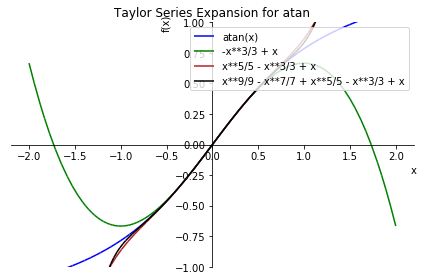

In [37]:
from sympy import *
%matplotlib inline

def f(x):
    return atan(x) 

x = Symbol('x')

def ts_integral(f, x, n = 5,lim1 = None, lim2 =None):
    res_int = 0
    tylor_f = f(x).series(x, 0, n).removeO() # taylor series around 0 with max power n
    res_int = integrate(f(x), (x, lim1, lim2)) 
    return tylor_f, res_int.evalf(3)  

print("Tylor Series of f(x): ", ts_integral(f, x, 10, 0, pi/4)[0])
print("Integral of f(x): ",ts_integral(f, x, 10, 0, pi/4)[1])


## (sympy.plotting)plot the tylor series of atan(x)    
p = plot(atan(x),ts_integral(f, x, 5, 0, pi/4)[0],ts_integral(f, x, 7, 0, pi/4)[0],ts_integral(f, x, 10, 0, pi/4)[0],
         (x,-2,2),ylim=(-1, 1),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for atan'
p.show()

### **b. Solve a Differential Equation**

**Problem statement**

Solve the following differential equation in SymPy:

$$\frac{d^2y}{dx^2} + 2\frac{dy}{dx} +y(x) = \sin(x)$$

In [38]:
from sympy import *

x = Symbol('x')
y = Function('y')(x)

dydx = y.diff(x)
dy2dx2 = y.diff(x,2) # alternatively d2ydx2 = dydx.diff(x) or y.diff(x,x)


diffEqu  = Eq(dy2dx2 + 2*dydx + y, sin(x))
z = dsolve(diffEqu)
print(z.rhs)

(C1 + C2*x)*exp(-x) - cos(x)/2
